# Group Members


*   M. Rehan Ali (1802008)
*   Shahrukh Khan (1802029)
*   Salman Ali (1802010)


In [ ]:
############################################
##########  Import Libraries  #############
import cv2
import numpy as np
import os

In [ ]:
###################  Import Keras Related Functions  ############
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle
import time

In [ ]:
########################################################
###########  Mount Google Derive ######################
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
########################################################3
#######  Some Variables for Data   #####################
Dataset = []
classNumber = 0         # numbered the class 
classNames=['Bacterial_Pepper','Healthy_Pepper'] #---> 0 : Bacterial  -- 1 : Healthy
img_size = 224        # Size of Image tha we have defined
path = "/content/drive/My Drive/PepperDataset2"      #path of dataset

In [ ]:
Dataset.clear()

###  Read all images category wise  #######
for folder in (os.listdir(path)):
  print(classNumber)
  fp = os.path.join(path,folder)
  print(fp)
  for eachImage in os.listdir(fp): 
    imagePath = os.path.join(fp,eachImage)
    img = cv2.imread(imagePath)/255.0
    resized_image=cv2.resize(img,(img_size,img_size))
    Dataset.append([resized_image,classNumber])
  classNumber = classNumber + 1
  
#print(Dataset[0])
#print(len(Dataset))

0
/content/drive/My Drive/PepperDataset2/Bacterial_Pepper
1
/content/drive/My Drive/PepperDataset2/Healthy_Pepper
[array([[[0.55848337, 0.5545618 , 0.6173069 ],
        [0.56286513, 0.55894356, 0.62168866],
        [0.53033212, 0.52641055, 0.58915565],
        ...,
        [0.6105441 , 0.59877939, 0.66152449],
        [0.58295287, 0.57118816, 0.63393326],
        [0.5881953 , 0.57643059, 0.63917569]],

       [[0.58921567, 0.5852941 , 0.6480392 ],
        [0.64087635, 0.63695478, 0.69969988],
        [0.58983593, 0.58591436, 0.64865946],
        ...,
        [0.60250088, 0.59073617, 0.65348127],
        [0.58861525, 0.57685054, 0.63959564],
        [0.60626256, 0.59449786, 0.65724295]],

       [[0.50134053, 0.49741896, 0.56016406],
        [0.59109644, 0.58717487, 0.64991997],
        [0.58951581, 0.58559424, 0.64833934],
        ...,
        [0.59847927, 0.58671456, 0.64945966],
        [0.58821511, 0.57645041, 0.63919551],
        [0.61410571, 0.60234101, 0.66508611]],

       ...,


In [ ]:
Images=[]
Labels=[]
np.random.shuffle(Dataset)      # shuffle dataset to prevent overfitting
for image, label in Dataset:
    Images.append(image)
    Labels.append(label)
print(len(Images))
  

1997


In [ ]:
# Reshaping Input Data/ Images
import copy
Images = np.array(Images).reshape(-1, img_size, img_size,3) 
Labels=np.array(Labels)

#Split Data into Training and Testing
train_images,test_images,train_labels,test_labels=train_test_split(Images,Labels,test_size=0.2)
print(len(train_images))
print(len(test_images))


temp_train_labels=copy.deepcopy(train_labels)
temp_test_labels=copy.deepcopy(test_labels)
temp_labels=copy.deepcopy(Labels)

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(len(Images))
print(Images[0])
print(Labels)

1597
400
1997
[[[0.81148456 0.73697476 0.77226887]
  [0.81064424 0.73613444 0.77142855]
  [0.80626249 0.73175268 0.7670468 ]
  ...
  [0.73795516 0.64775908 0.70266104]
  [0.75472201 0.66452593 0.71942789]
  [0.72659054 0.63639447 0.69129643]]

 [[0.80700278 0.73249298 0.7677871 ]
  [0.80634254 0.73183273 0.76712685]
  [0.80392157 0.72941176 0.76470588]
  ...
  [0.74543822 0.65524214 0.7101441 ]
  [0.70938348 0.61918741 0.67408937]
  [0.75440189 0.66420581 0.71910777]]

 [[0.80252099 0.72801119 0.7633053 ]
  [0.80252101 0.7280112  0.76330532]
  [0.80302121 0.7285114  0.76380552]
  ...
  [0.74479826 0.65460218 0.70950414]
  [0.74525834 0.65506226 0.70996422]
  [0.75866348 0.6684674  0.72336936]]

 ...

 [[0.7744293  0.69207636 0.72737047]
  [0.74307684 0.6607239  0.69601802]
  [0.78165255 0.69929961 0.73459372]
  ...
  [0.70150052 0.61914758 0.65444169]
  [0.70029999 0.61794705 0.65324117]
  [0.70104027 0.61868733 0.65398144]]

 [[0.78277285 0.70041991 0.73571403]
  [0.75102021 0.6686672

In [ ]:
############  Sequential Model (CNN Architecture)  ############
model = Sequential()

# 1st CONV2D & MaxPooling Layer
model.add(Conv2D(100, (8, 8), input_shape=(224,224,3),activation='relu',strides=(3,3)))
model.add(MaxPooling2D(pool_size=(4, 4),strides=(2,2)))
#model.add(Dropout(0.3))

# 2nd Conv2D & MaxPooling Layer
model.add(Conv2D(200, (5, 5),activation='relu',strides=(2,2)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
#model.add(Dropout(0.3))

#3rd Conv2D & MaxPooling Layer
model.add(Conv2D(250, (3, 3),activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
#model.add(Dropout(0.3))



# flatten data for feeding to feed forward NN
model.add(Flatten())

model.add(Dense(2048,activation='relu'))          # Dense layer of  neurons
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))


#final Layer 
model.add(Dense(2))
model.add(Activation('softmax'))  #softmax activation fn for classification

In [ ]:
# Configuration of Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )
model.summary()      #Output Shape formula=[(input_size-kernel_size+ 2P)/S]+1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 100)       19300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 200)       500200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 250)         450250    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 250)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4000)              0

In [ ]:
history=model.fit(train_images,train_labels,epochs=20,validation_split=0.2)  # seprate 20% data for validation
# Saving Model
model.save("Rehan2_Mask.model") 

Epoch 1/20
40/40 [==============================] - 47s 1s/step - loss: 0.8203 - accuracy: 0.5161 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 2/20
40/40 [==============================] - 46s 1s/step - loss: 0.6455 - accuracy: 0.5881 - val_loss: 0.4517 - val_accuracy: 0.7969
Epoch 3/20
40/40 [==============================] - 46s 1s/step - loss: 0.4637 - accuracy: 0.8066 - val_loss: 0.3791 - val_accuracy: 0.8594
Epoch 4/20
40/40 [==============================] - 46s 1s/step - loss: 0.2494 - accuracy: 0.9123 - val_loss: 0.1905 - val_accuracy: 0.9219
Epoch 5/20
40/40 [==============================] - 46s 1s/step - loss: 0.1995 - accuracy: 0.9225 - val_loss: 0.1422 - val_accuracy: 0.9563
Epoch 6/20
40/40 [==============================] - 46s 1s/step - loss: 0.1586 - accuracy: 0.9452 - val_loss: 0.1419 - val_accuracy: 0.9563
Epoch 7/20
40/40 [==============================] - 46s 1s/step - loss: 0.2162 - accuracy: 0.9154 - val_loss: 0.1461 - val_accuracy: 0.9344
Epoch 8/20
40/40 [==

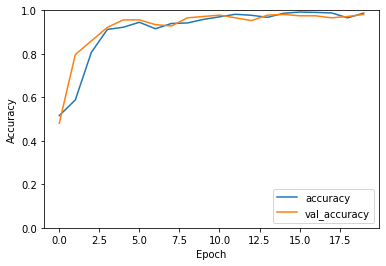

In [ ]:
# Plot Accuracy history during Trainig
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

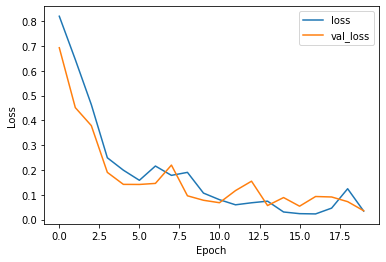

In [ ]:
# Plot loss history during training
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0,1])
plt.legend(loc='upper right')

In [ ]:
#Evaluate model on testing data
model.evaluate(test_images,test_labels)

13/13 [==============================] - 4s 279ms/step - loss: 0.0369 - accuracy: 0.9925


[0.03688346594572067, 0.9925000071525574]

In [ ]:
# Complete Classification Report on testing data

from sklearn.metrics import classification_report
predicted_labels=model.predict(test_images)
pred_classes = [np.argmax(element) for element in predicted_labels]
print(pred_classes)
print("Classification Report \n",classification_report(temp_test_labels,pred_classes))

[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 

In [ ]:
# Complete Classification Report on training data

predicted_labels=model.predict(train_images)
pred_classes = [np.argmax(element) for element in predicted_labels]
print(pred_classes)
print("Classification Report \n",classification_report(temp_train_labels,pred_classes))

[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 

In [ ]:
#Preprocess image before sending for prediction
def prepare(filepath):
    img_size = 224
    img = cv2.imread(filepath)/255.0 
    img_resize = cv2.resize(img, (img_size, img_size))
    return img_resize.reshape(-1, img_size, img_size, 3)

#Predict Images
image_path="pepper_bacterial6.jpg"
image_read=cv2.imread(image_path)
prediction = model.predict(prepare(image_path))
print((prediction))


CATEGORIES = ["Bacterial Leaf", "Healthy Leaf"]
pred_class = CATEGORIES[np.argmax(prediction)]
print(pred_class)


#############################################################
"""
#cv2.imshow(pred_class,image_read)
counter=0

prediction=model.predict(test_images)
pred_classes = [np.argmax(element) for element in predicted_labels]
#print(pred_classes)
#print(temp_test_labels)

for i in range(10):
  print("Class :",i)
  print(prediction[i])
  print(temp_test_labels[i])

"""



NameError: ignored